# Feature Engineering

Preparo el dataset para ser posteriormente usado en el modelo

In [5]:
# !conda install ta-lib libta-lib

Indicadores a utilizar:

* Percentage price oscilator (PPO)
* Moving average convergence/divergence (MACD)
* Normalized average true range (NATR)
* Relative Strenght index (RSI)
* Bollinger Bands

In [73]:
import pandas as pd
import numpy as np
from talib import MACD, PPO, MACD, NATR, RSI, BBANDS, SMA

In [20]:
data = pd.read_pickle("2y_tickers.pkl")
data.head()

ALUA                                                        BBAR  \
             Open   High    Low  Close  Volume Dividends Stock Splits    Open   
Date                                                                            
2018-10-02  19.96  20.53  19.44  19.77  630425       0.0            0  152.17   
2018-10-03  19.68  21.00  19.39  20.44  857202       0.0            0  157.88   
2018-10-04  21.00  21.29  20.25  20.39  708669       0.0            0  150.86   
2018-10-05  20.44  20.81  19.54  19.87  306049       0.0            0  142.87   
2018-10-08  19.68  20.34  19.58  19.77  335673       0.0            0  136.19   

                            ...     SUPV                          TECO2  \
              High     Low  ...   Volume Dividends Stock Splits    Open   
Date                        ...                                           
2018-10-02  156.91  147.23  ...  1107947       0.0            0  122.34   
2018-10-03  164.66  148.68  ...   919541       0.0            0  123.40   
2018-10-04  150.86  140.45  ...   690451       0.0            0  122.78   
2018-10-05  144.81  135.61  ...   741961       0.0            0  121.47   
2018-10-08  138.51  133.67  ...   605639       0.0            0  119.32   

                                                                   
              High     Low   Close  Volume Dividends Stock Splits  
Date                                                               
2018-10-02  127.96  120.50  121.91   86008       0.0            0  
2018-10-03  125.90  121.47  122.78  152360       0.0            0  
2018-10-04  125.37  120.59  122.78  126659       0.0            0  
2018-10-05  123.66  119.27  119.27  132525       0.0            0  
2018-10-08  123.66  119.32  122.34   72995       0.0            0  

[5 rows x 84 columns]

In [77]:
SMA(data.ALUA.Close, timeperiod = 10).isnull().sum()

9

In [78]:
SMA(data.ALUA.Close, timeperiod = 10)

Date
2018-10-02      NaN
2018-10-03      NaN
2018-10-04      NaN
2018-10-05      NaN
2018-10-08      NaN
              ...  
2020-09-28    46.45
2020-09-29    46.40
2020-09-30    46.14
2020-10-01    46.62
2020-10-02    47.16
Length: 488, dtype: float64

In [82]:
import mplfinance
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime as datetime
import numpy as np


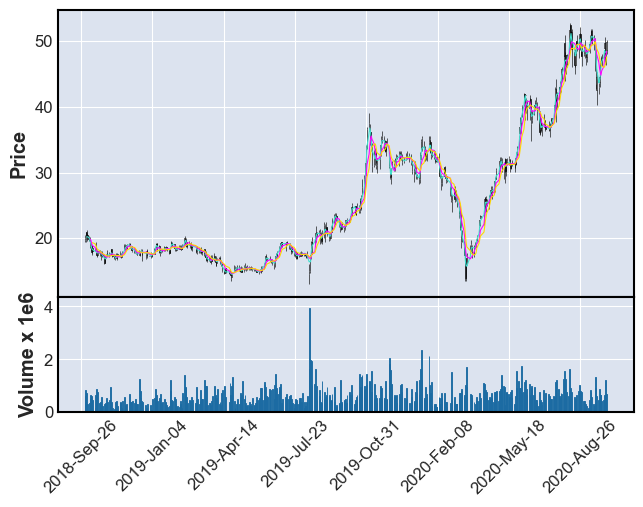

In [91]:
ax = mplfinance.plot(data.ALUA, type='candle',mav=(3,6,9),volume=True,show_nontrading=True)

In [137]:
alua = data.ALUA.reset_index().rename(columns={"Open": "open", "Close": "close", "High": "high", "Low": "low", "Date": "time"})

In [138]:
alua

,time,open,high,low,close,Volume,Dividends,Stock Splits
0,2018-10-02,19.96,20.53,19.44,19.77,630425,0.0,0
1,2018-10-03,19.68,21.00,19.39,20.44,857202,0.0,0
2,2018-10-04,21.00,21.29,20.25,20.39,708669,0.0,0
3,2018-10-05,20.44,20.81,19.54,19.87,306049,0.0,0
4,2018-10-08,19.68,20.34,19.58,19.77,335673,0.0,0
...,...,...,...,...,...,...,...,...
483,2020-09-28,47.50,48.50,47.50,48.45,467618,0.0,0
484,2020-09-29,48.95,49.90,47.50,49.80,644164,0.0,0
485,2020-09-30,49.90,50.60,46.60,46.80,1211807,0.0,0
486,2020-10-01,47.20,48.35,46.40,48.30,528066,0.0,0


In [139]:
# alua["time"] = alua.time.values.astype(np.int64) // 10 ** 9

In [140]:
alua

,time,open,high,low,close,Volume,Dividends,Stock Splits
0,2018-10-02,19.96,20.53,19.44,19.77,630425,0.0,0
1,2018-10-03,19.68,21.00,19.39,20.44,857202,0.0,0
2,2018-10-04,21.00,21.29,20.25,20.39,708669,0.0,0
3,2018-10-05,20.44,20.81,19.54,19.87,306049,0.0,0
4,2018-10-08,19.68,20.34,19.58,19.77,335673,0.0,0
...,...,...,...,...,...,...,...,...
483,2020-09-28,47.50,48.50,47.50,48.45,467618,0.0,0
484,2020-09-29,48.95,49.90,47.50,49.80,644164,0.0,0
485,2020-09-30,49.90,50.60,46.60,46.80,1211807,0.0,0
486,2020-10-01,47.20,48.35,46.40,48.30,528066,0.0,0


In [141]:
alua[['time','open','close','high','low']]

,time,open,close,high,low
0,2018-10-02,19.96,19.77,20.53,19.44
1,2018-10-03,19.68,20.44,21.00,19.39
2,2018-10-04,21.00,20.39,21.29,20.25
3,2018-10-05,20.44,19.87,20.81,19.54
4,2018-10-08,19.68,19.77,20.34,19.58
...,...,...,...,...,...
483,2020-09-28,47.50,48.45,48.50,47.50
484,2020-09-29,48.95,49.80,49.90,47.50
485,2020-09-30,49.90,46.80,50.60,46.60
486,2020-10-01,47.20,48.30,48.35,46.40


In [142]:
from mplfinance.original_flavor import candlestick2_ochl

(<matplotlib.collections.LineCollection at 0x22baf4adc08>,
 <matplotlib.collections.PolyCollection at 0x22baf4addc8>)

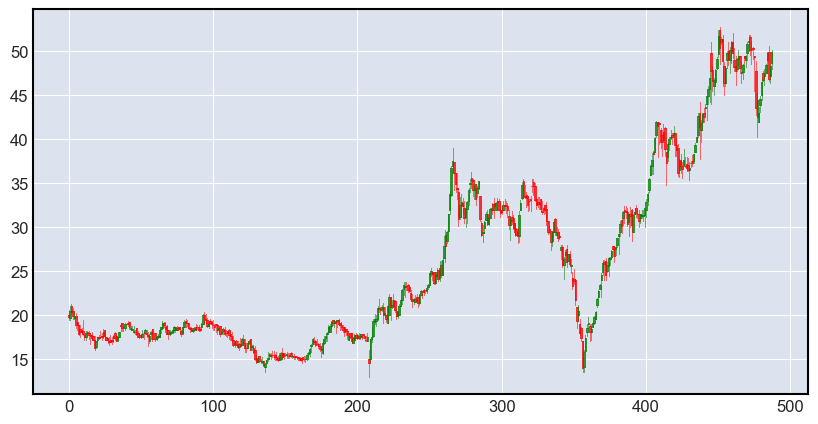

In [143]:
fig, ax = plt.subplots(figsize=(10, 5))
candlestick2_ochl(ax, alua.open, alua.close, alua.high, alua.low, width=1, colorup='green', colordown='r', alpha=0.55)